In [1]:
import torch

In [2]:
x = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
y = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]

In [3]:
x = torch.tensor(x)
y = torch.tensor(y)

In [4]:
w = torch.rand(1)
b = torch.rand(1)

def model(x, w, b):
    return w * x + b

In [5]:
def loss_fn(ŷ, y):
    squared_diffs = (ŷ - y)**2
    return squared_diffs.mean()

In [6]:
ŷ = model(x, w, b)
print(ŷ)

tensor([18.9437, 29.3478, 30.5325, 42.7393, 29.5539, 25.7425, 18.0166, 11.7845,
        25.4849, 31.6656, 35.7860])


In [7]:
loss = loss_fn(ŷ, y)
print(loss)

tensor(283.1465)


In [8]:
delta = 0.1

In [9]:
dl_dw = (loss_fn(model(x, w + delta, b), y) - loss_fn(model(x, w - delta, b), y)) / (2.0 * delta)

print(dl_dw)

tensor(1722.6752)


In [10]:
learning_rate = 1e-4

In [11]:
print(w)
w = w - learning_rate * dl_dw
print(w)

tensor([0.5151])
tensor([0.3428])


In [12]:
dl_db = (loss_fn(model(x, w, b + delta), y) - loss_fn(model(x, w, b - delta), y)) / (2.0 * delta)

print(b)
b = b - learning_rate * dl_db
print(b)

tensor([0.5563])
tensor([0.5547])


In [13]:
ŷ = model(x, w, b)
print(ŷ)

tensor([12.7922, 19.7165, 20.5049, 28.6290, 19.8536, 17.3170, 12.1752,  8.0275,
        17.1456, 21.2591, 24.0014])


In [14]:
loss = loss_fn(ŷ, y)
print(loss)

tensor(73.6327)


In [15]:
def dl_dŷ(ŷ, y):
    return 2 * (ŷ - y)

In [16]:
def dŷ_dw(x, w, b):
    return x

In [17]:
def dŷ_db(x, w, b):
    return 1.0

In [18]:
def grad_fn(x, y, ŷ, w, b):
    dl_dw = dl_dŷ(ŷ, y) * dŷ_dw(x, w, b)
    dl_db = dl_dŷ(ŷ, y) * dŷ_db(x, w, b)
    return torch.stack([dl_dw.mean(), dl_db.mean()])

In [19]:
def training_loop(n_epochs, learning_rate, params, x, y):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        ŷ = model(x, w, b)
        loss = loss_fn(ŷ, y)
        grad = grad_fn(x, y, ŷ, w, b)

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 1000}:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            print('    Params:', params)
            print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break
            
    return params

In [20]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-4, 
    params = torch.rand(2), 
    x = x, 
    y = y)

Epoch 1, Loss 322.881073
    Params: tensor([0.3496, 0.6831])
    Grad:   tensor([1852.0786,   35.7744])
Epoch 2, Loss 80.677361
    Params: tensor([0.2733, 0.6814])
    Grad:   tensor([762.3902,  16.5797])
Epoch 3, Loss 39.632156
    Params: tensor([0.2419, 0.6806])
    Grad:   tensor([313.8112,   8.6781])
...
Epoch 10, Loss 31.250618
    Params: tensor([0.2201, 0.6780])
    Grad:   tensor([0.5733, 3.1601])
Epoch 11, Loss 31.249603
    Params: tensor([0.2200, 0.6777])
    Grad:   tensor([0.2034, 3.1535])
...
Epoch 99, Loss 31.162439
    Params: tensor([0.2205, 0.6500])
    Grad:   tensor([-0.0554,  3.1441])
Epoch 100, Loss 31.161449
    Params: tensor([0.2205, 0.6497])
    Grad:   tensor([-0.0554,  3.1440])
...
Epoch 1000, Loss 30.285408
    Params: tensor([0.2255, 0.3689])
    Grad:   tensor([-0.0544,  3.0949])


In [21]:
xn = 0.1 * x

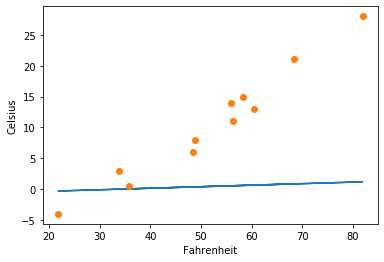

In [22]:
import numpy
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

ŷ = model(xn, *params)  # <1>

fig = plt.figure()
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(x.numpy(), ŷ.detach().numpy()) # <2>
plt.plot(x.numpy(), y.numpy(), 'o')